# Weather Forecasting

* Import Dataset, Describe data, Check null value.
* Data Visualize Representation
* Analyzing Temperature Change.
* Forecasting Weather using Python.

### Import Dataset, Describe data, Check null value.

In [1]:
import pandas as pd
data = pd.read_csv("E:\ML_Projects\Weather_Forecasting\Dataset\DailyDelhiClimateTrain.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


### Data Visualize Representation

In [4]:
import plotly.express as px

featureIteam = ["meantemp", "humidity","wind_speed","meanpressure"]


for n in range(0,len(featureIteam)):
    figure = px.scatter(data_frame=data, 
                        x=data['date'], 
                        y=data[f'{featureIteam[n]}'],
                        title=f"{featureIteam[n]} Per Date :",
                        color=f"{featureIteam[n]}")
    figure.show()

In [5]:
figure2 = px.scatter(data_frame=data, 
                    x = data['humidity'],
                    y=data['meantemp'],
                    size="meantemp",
                    trendline="ols",
                    color="meantemp",
                    title = "Relationship Between Temperature and Humidity")

figure2.show()

In [6]:
figure3 = px.scatter(data_frame=data,
                     x = data['wind_speed'],
                     y = data['meanpressure'],
                     color="meanpressure",
                     trendline="ols",
                     size="wind_speed",
                     title="Relationship Between wind_speed and meanpressure")

figure3.show()

### Analyzing Temperature Change

In [33]:
data["date"] = pd.to_datetime(data['date'],format='%Y-%M-%d')
data['year'] = data['date'].dt.year
data["month"] = data['date'].dt.month

data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01 00:01:00,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02 00:01:00,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03 00:01:00,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04 00:01:00,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05 00:01:00,6.000000,86.833333,3.700000,1016.500000,2013,1


<Axes: xlabel='month', ylabel='meantemp'>

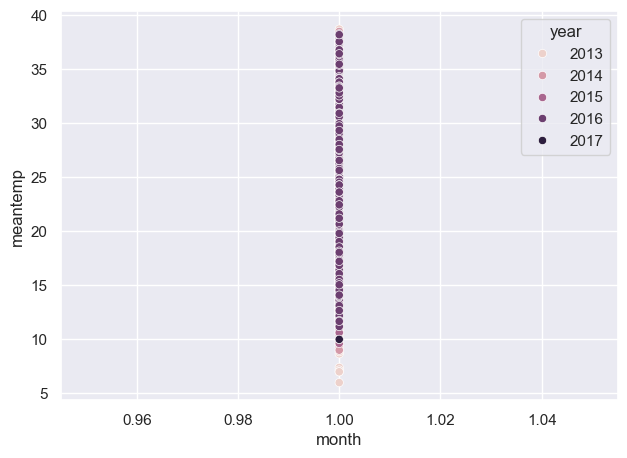

In [38]:

import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.scatterplot(x=data["month"], y=data['meantemp'],
             hue=data['year'],
             data=data)

## Forecasting Weather using Python.
* Random Forest Model
* facebook Prophet Model for weather forecasting.

### Random Forest Model

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



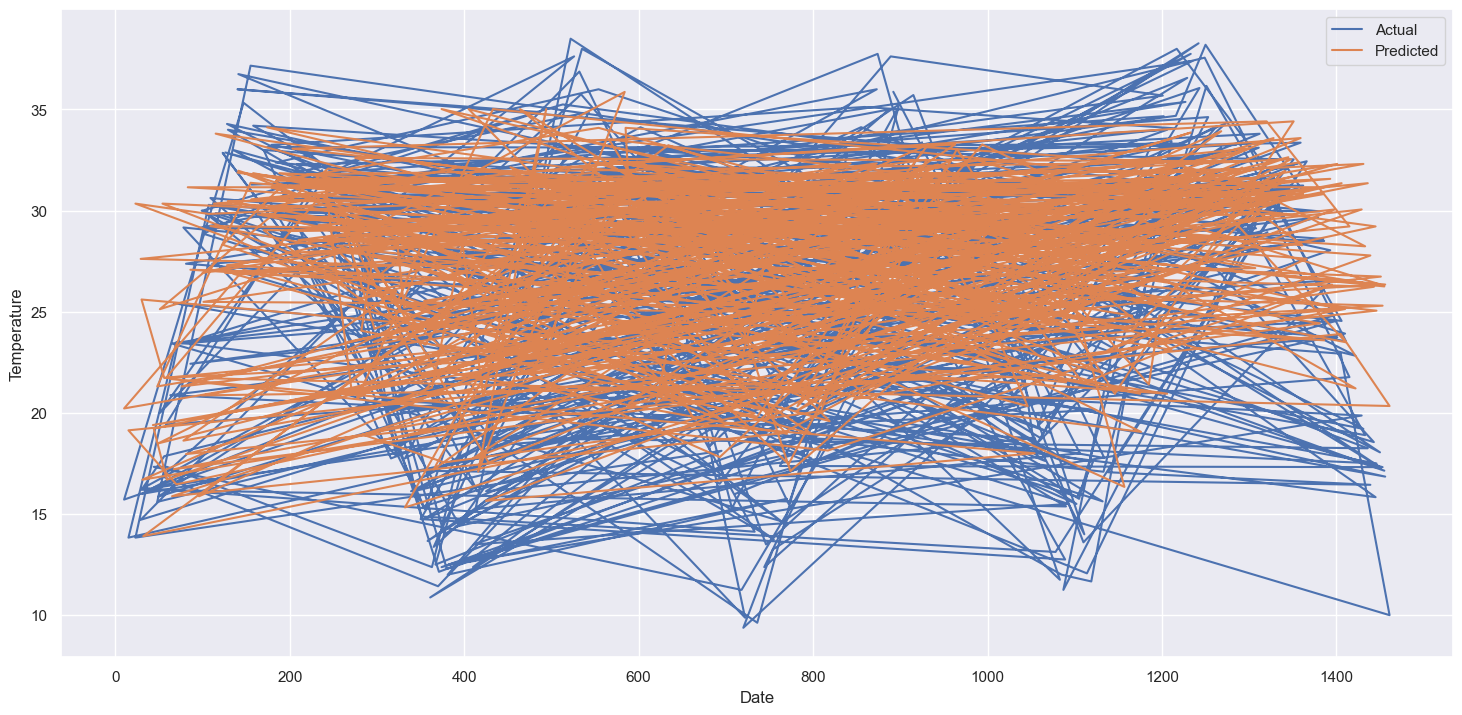

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

x = data[['date']]
y = data[['meantemp']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)


# Model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

# predictions
predictions = model.predict(x_test)


plt.figure(figsize=(16, 8))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### Prophet Model

In [54]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import pandas as pd

# Assuming you have your data in a pandas DataFrame named 'forecast_data'
# The DataFrame should have two columns: 'ds' (date) and 'y' (value to forecast)


forecast_data = data.rename(columns={"date":"ds", 
                                     "meantemp":"y"})

model = Prophet()

model.fit(forecast_data)

# Create a dataframe to hold the predictions
# 'periods' is the number of days into the future you want to predict
forecasts = model.make_future_dataframe(periods=365)

# Make predictions
predictions = model.predict(forecasts)

# Plot the predictions
plot_plotly(model, predictions).show()


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

23:09:58 - cmdstanpy - INFO - Chain [1] start processing
23:10:00 - cmdstanpy - INFO - Chain [1] done processing
